# 1. DATA UPLOADING, PREPARATION AND ANALYSIS 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#data uploading
df = pd.read_csv("https://raw.githubusercontent.com/Kelvin-M-Njoki/pula_data/main/data.csv", header=0)

# Drop the header row
df.drop(0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(5)


,Hour 0 represents the hour from midnight to 01:00 and hour 23 represents the hour from 23:00 to midnight.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),NaN,NaN
1,0,1/1/2020 0:00,0.0000000,1.5098490,NaN,NaN
2,1,1/1/2020 1:00,0.0000000,1.4118588,NaN,NaN
3,2,1/1/2020 2:00,0.0000000,1.0238976,NaN,NaN
4,3,1/1/2020 3:00,0.0000000,0.6420000,NaN,NaN


In [3]:
header_row = df.iloc[0]

# Drop the current header row
df = df[1:]
df.reset_index(drop=True, inplace=True)
df.columns = header_row

# Drop the last two columns
df = df.iloc[:, :-2]

df.head(5)


,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,1/1/2020 0:00,0.0000000,1.5098490
1,1,1/1/2020 1:00,0.0000000,1.4118588
2,2,1/1/2020 2:00,0.0000000,1.0238976
3,3,1/1/2020 3:00,0.0000000,0.6420000
4,4,1/1/2020 4:00,0.0000000,0.9600000


In [4]:
df.shape

(82734, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82734 entries, 0 to 82733
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Hour                                8760 non-null   object
 1   Date/hour start                     8760 non-null   object
 2   Solar electricity generation (kWh)  8760 non-null   object
 3   Electricity usage (kWh)             8760 non-null   object
dtypes: object(4)
memory usage: 2.5+ MB


In [6]:
# convert from object to float
df['Electricity usage (kWh)'] = df['Electricity usage (kWh)'].str.replace(',', '').astype(float)
df['Solar electricity generation (kWh)'] = df['Solar electricity generation (kWh)'].str.replace(',', '').astype(float)
df.describe()

,Solar electricity generation (kWh),Electricity usage (kWh)
count,8760.000000,8760.000000
mean,1.116750,7.312704
std,2.026098,491.479806
min,0.000000,-12.624000
25%,0.000000,0.300000
50%,0.024000,0.621000
75%,1.272750,1.686000
max,13.050000,46000.000000


In [7]:
# Check for missing values in each column
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)


Missing values in each column:
0
Hour                                  73974
Date/hour start                       73974
Solar electricity generation (kWh)    73974
Electricity usage (kWh)               73974
dtype: int64


In [8]:
# Drop rows with missing values
df.dropna(inplace=True)
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
0
Hour                                  0
Date/hour start                       0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
dtype: int64


## outliers 

### 1. Electricity usage (kWh) outliers

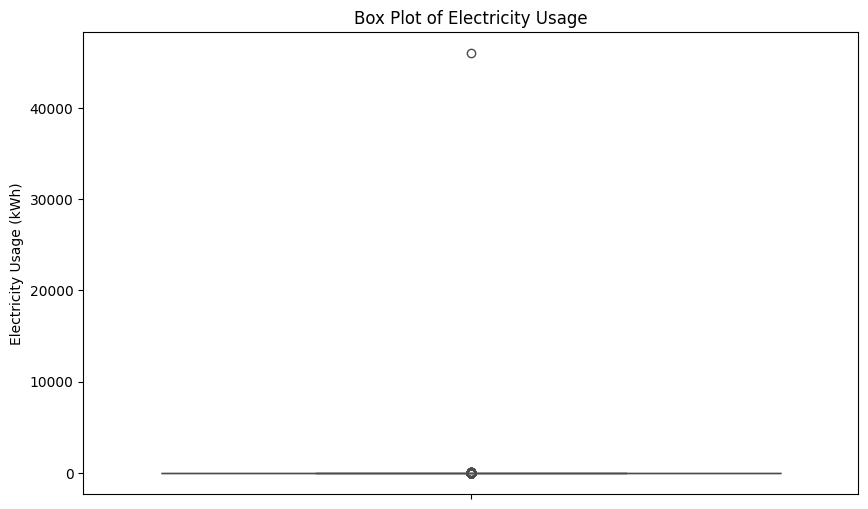

In [10]:
# Electricity usage (kWh) outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Electricity usage (kWh)'], color='red')

plt.title('Box Plot of Electricity Usage')
plt.ylabel('Electricity Usage (kWh)')

plt.show()

In [11]:
df[df['Electricity usage (kWh)'] > 40000]

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
276,12,1/12/2020 12:00,5.214,46000.0


In [12]:
# dropping the outlier
# Drop the row containing the outlier value (46000) in the 'Electricity usage (kWh)' column
df = df[df['Electricity usage (kWh)'] != 46000]

### 2. Solar electricity generation (kWh) outliers

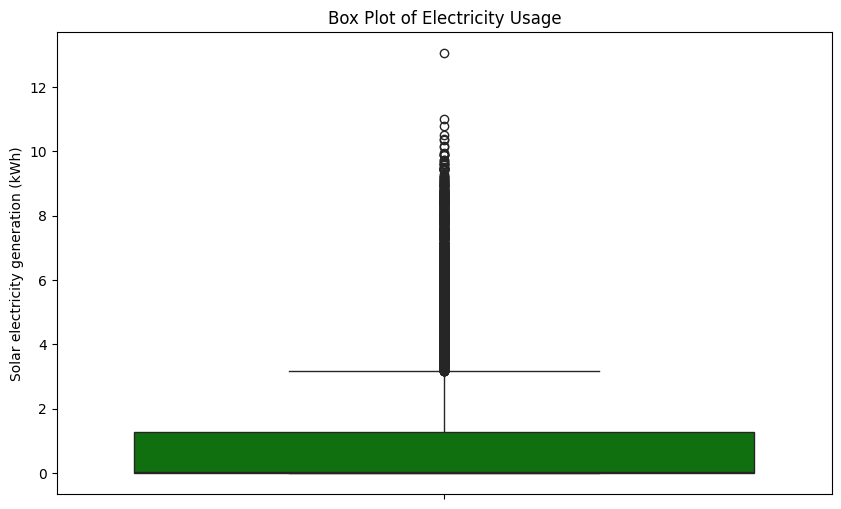

In [13]:
# Electricity usage (kWh) outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create box plot for 'Electricity usage (kWh)' with color
sns.boxplot(data=df['Solar electricity generation (kWh)'], color='green')

# Set the title and labels
plt.title('Box Plot of Electricity Usage')
plt.ylabel('Solar electricity generation (kWh)')

# Show the plot
plt.show()

the data seems perfect with one noticerble  outlier, for the purpose of this analysis, we have choosen to keep the outlier

# Solar Electricity and usage averages Graph

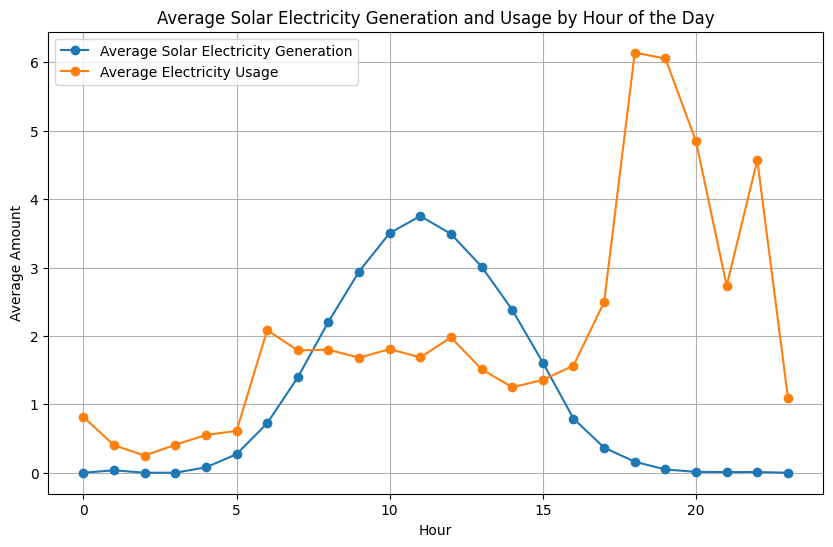

In [24]:

#  columns -'Hour', 'Solar electricity generation (kWh)', and 'Electricity usage (kWh)'

hourly_avg_solar = df.groupby('Hour')['Solar electricity generation (kWh)'].mean()
hourly_avg_electricity = df.groupby('Hour')['Electricity usage (kWh)'].mean()

plt.figure(figsize=(10, 6))

plt.plot(hourly_avg_solar.index, hourly_avg_solar, label='Average Solar Electricity Generation', marker='o')
plt.plot(hourly_avg_electricity.index, hourly_avg_electricity, label='Average Electricity Usage', marker='o')

plt.xlabel('Hour')
plt.ylabel('Average Amount')
plt.title('Average Solar Electricity Generation and Usage by Hour of the Day')
plt.legend()
plt.grid(True)
plt.show()



### solar electricity generation seems to have a normal distibution.

## 2. electricity needed to be purchased 

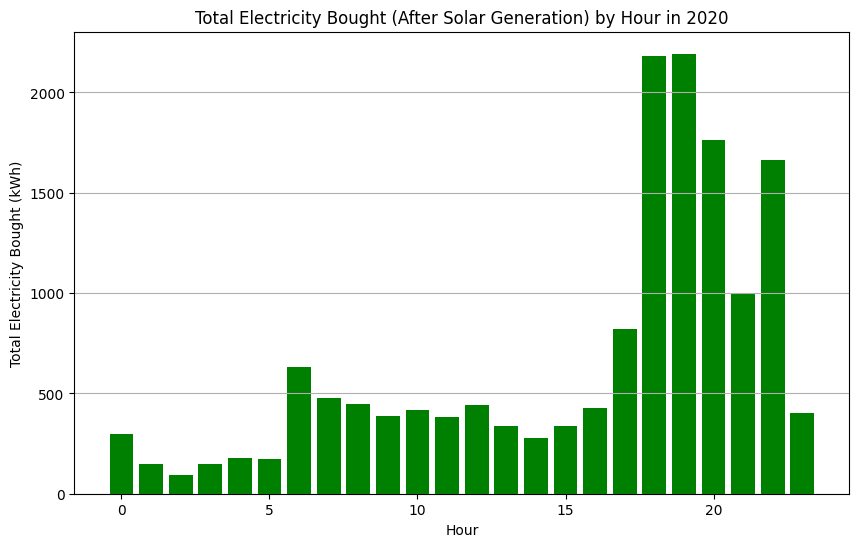

In [26]:
# this is electricity used less the electricity generated by the solar
df['Electricity bought'] = df['Electricity usage (kWh)'] - df['Solar electricity generation (kWh)']
df['Electricity bought'] = df['Electricity bought'].clip(lower=0)

hourly_total = df[df['Date/hour start'].str.contains('2020')].groupby('Hour')['Electricity bought'].sum()

plt.figure(figsize=(10, 6))
plt.bar(hourly_total.index, hourly_total, color='green')
plt.xlabel('Hour')
plt.ylabel('Total Electricity Bought (kWh)')
plt.title('Total Electricity Bought (After Solar Generation) by Hour in 2020')
plt.grid(axis='y')
plt.savefig('Total Electricity Bought.png') 
plt.show()


## 3. hourly solar elecricity generated over the electicity used(excess)

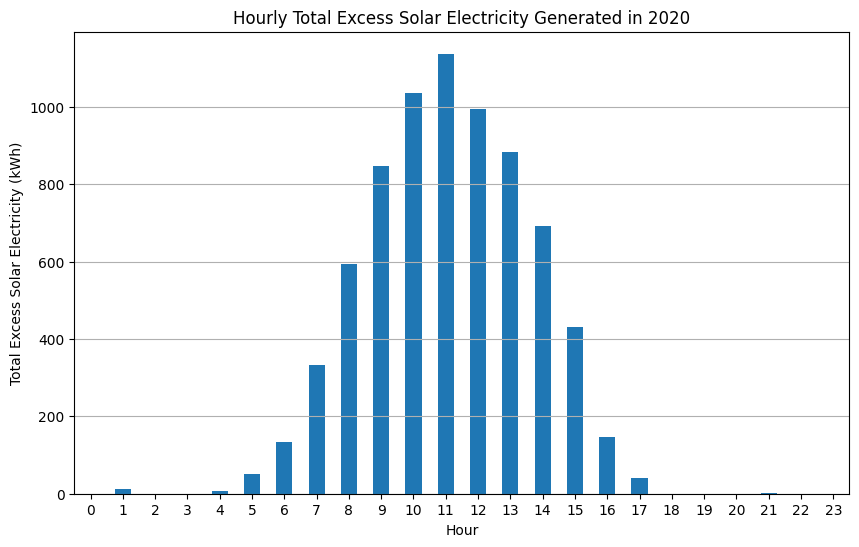

In [27]:
#creating the column
df['Excess solar electricity (kWh)'] = df['Solar electricity generation (kWh)'] - df['Electricity usage (kWh)']
df['Excess solar electricity (kWh)'] = df['Excess solar electricity (kWh)'].clip(lower=0)
#excess power
hourly_total_excess = df[df['Date/hour start'].str.contains('2020')].groupby('Hour')['Excess solar electricity (kWh)'].sum()

hourly_total_excess.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Hour')
plt.ylabel('Total Excess Solar Electricity (kWh)')
plt.title('Hourly Total Excess Solar Electricity Generated in 2020')
plt.xticks(rotation=0) 
plt.grid(axis='y')  
plt.savefig('excess_solar.png') 
plt.show()

## 4.cumulative battery charge levels

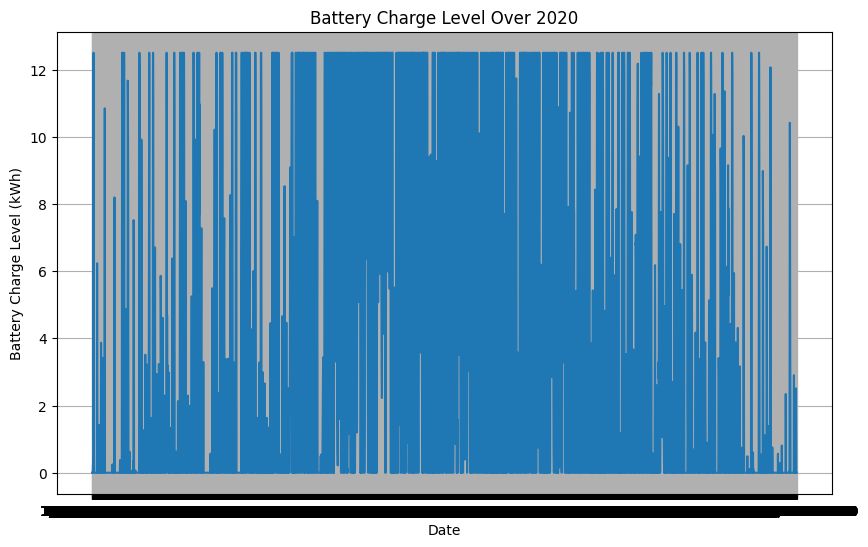

In [28]:
battery_charge = 0

# Initialize list to store battery charge levels for each hour
battery_charge_levels = []


for index, row in df[df['Date/hour start'].str.contains('2020')].iterrows():
    """iterates over each hour and calculates the net electricity flow, update the battery chargeand append the 
    battery charge levels list"""
    net_electricity_flow = row['Excess solar electricity (kWh)'] - row['Electricity bought']

    battery_charge += net_electricity_flow
    
    battery_charge = np.clip(battery_charge, 0, 12.5)
    
    battery_charge_levels.append(battery_charge)

battery_charge_levels = np.array(battery_charge_levels)

# Plot battery charge level over 2020
plt.figure(figsize=(10, 6))
plt.plot(df[df['Date/hour start'].str.contains('2020')]['Date/hour start'], battery_charge_levels)
plt.xlabel('Date')
plt.ylabel('Battery Charge Level (kWh)')
plt.title('Battery Charge Level Over 2020')
plt.grid(True)
plt.show()


## 4.Amount of electricity bought for each hour in 2020 (with battery)

In [29]:
# Initialize list 
electricity_bought_with_battery = []

# Initialize battery charge level to zero
battery_charge = 0

# Iterate over each hour in 2020
for index, row in df[df['Date/hour start'].str.contains('2020')].iterrows():
    """Calculate net electricity flow (excess solar electricity - electricity bought)"""
    net_electricity_flow = row['Excess solar electricity (kWh)'] - row['Electricity bought']
    battery_charge += net_electricity_flow
    battery_charge = np.clip(battery_charge, 0, 12.5)
    electricity_bought_with_battery.append(max(row['Electricity bought'] - battery_charge, 0))
electricity_bought_with_battery = np.array(electricity_bought_with_battery)
print("Amount of electricity bought for each hour in 2020 (with battery):\n", electricity_bought_with_battery)

Amount of electricity bought for each hour in 2020 (with battery):
 [1.509849  1.4118588 1.0238976 ... 2.022     1.653     0.8059194]


In [30]:
## adding batterly levels to the dataframe
df.loc[df['Date/hour start'].str.contains('2020'), 'Electricity bought with battery'] = electricity_bought_with_battery

df.loc[df['Date/hour start'].str.contains('2020'), 'Battery charge level (kWh)'] = battery_charge_levels

df.head()


,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Electricity bought,Excess solar electricity (kWh),Electricity bought with battery,Battery charge level (kWh)
0,0,1/1/2020 0:00,0.0,1.509849,1.509849,0.0,1.509849,0.0
1,1,1/1/2020 1:00,0.0,1.411859,1.411859,0.0,1.411859,0.0
2,2,1/1/2020 2:00,0.0,1.023898,1.023898,0.0,1.023898,0.0
3,3,1/1/2020 3:00,0.0,0.642000,0.642000,0.0,0.642000,0.0
4,4,1/1/2020 4:00,0.0,0.960000,0.960000,0.0,0.960000,0.0


In [31]:
# Define electricity prices
electricity_price_2022 = 0.17  

# cost without the battery
total_cost_without_battery = df['Electricity bought'].sum() * electricity_price_2022

# cost  with the battery
total_cost_with_battery = df['Electricity bought with battery'].sum() * electricity_price_2022

# savings
savings_over_2020 = round(total_cost_without_battery - total_cost_with_battery,3)

# Display the savings
print("Savings 1n 2020: $", savings_over_2020)

Savings 1n 2020: $ 288.591


## 5. monthly solar genaration and usage with and without the battery

Monthly Data:
                 Solar Generation (kWh)  Usage (kWh)  \
Date/hour start                                        
2020-01                         261.045  1705.180181   
2020-02                         449.634  1557.578810   
2020-03                         602.451  1797.859450   
2020-04                         915.132  1726.356487   
2020-05                        1641.360   943.803809   
2020-06                        1408.287  1158.995538   
2020-07                        1371.465  1196.957121   
2020-08                        1158.639  1491.525351   
2020-09                         835.680  1620.714165   
2020-10                         546.132  1420.745585   
2020-11                         381.723  1479.005869   
2020-12                         205.965  1960.563395   

                 Electricity Purchased without Battery (kWh)  \
Date/hour start                                                
2020-01                                          1599.601181   
2020-02  

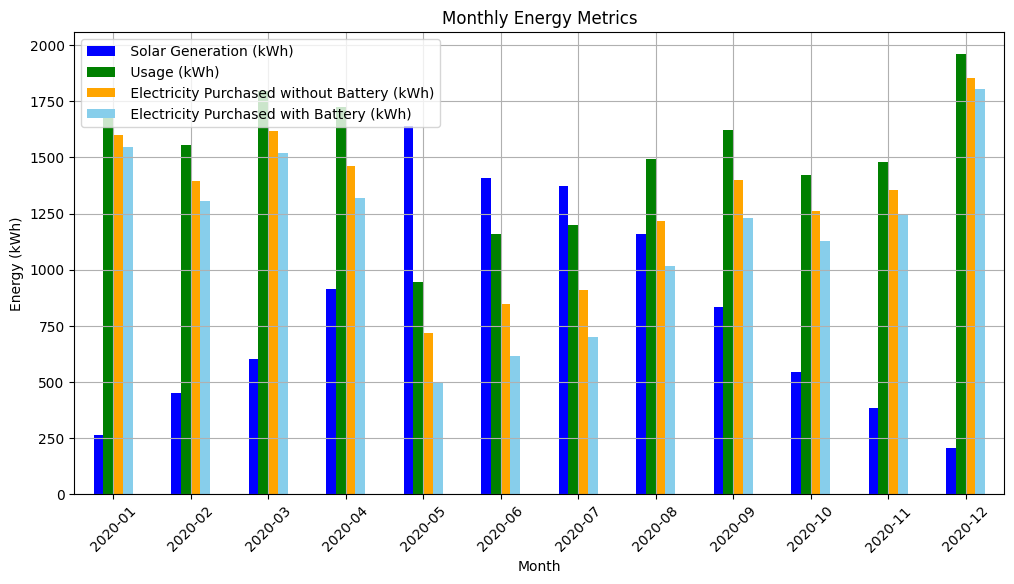

In [33]:
# Convert 'Date/hour start' column to datetime format
df['Date/hour start'] = pd.to_datetime(df['Date/hour start'])

# Group by month
monthly_solar_generation = df.groupby(df['Date/hour start'].dt.strftime('%Y-%m'))['Solar electricity generation (kWh)'].sum()
monthly_electricity_usage = df.groupby(df['Date/hour start'].dt.strftime('%Y-%m'))['Electricity usage (kWh)'].sum()
monthly_electricity_purchased_without_battery = df.groupby(df['Date/hour start'].dt.strftime('%Y-%m'))['Electricity bought'].sum()
monthly_electricity_purchased_with_battery = df.groupby(df['Date/hour start'].dt.strftime('%Y-%m'))['Electricity bought with battery'].sum()

monthly_data = pd.DataFrame({
    ' Solar Generation (kWh)': monthly_solar_generation,
    ' Usage (kWh)': monthly_electricity_usage,
    ' Electricity Purchased without Battery (kWh)': monthly_electricity_purchased_without_battery,
    ' Electricity Purchased with Battery (kWh)': monthly_electricity_purchased_with_battery
})

# tabulated data
print("Monthly Data:")
print(monthly_data)


monthly_data.plot(kind='bar', figsize=(12, 6), color=['blue', 'green', 'orange', 'skyblue'])
plt.title('Monthly Energy Metrics')
plt.xlabel('Month')
plt.ylabel('Energy (kWh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig('montly_.png') 
plt.show()


## 6. savings projections in 20 years

####  1.	Electricity prices increase as expected by the government, 4% p.a.

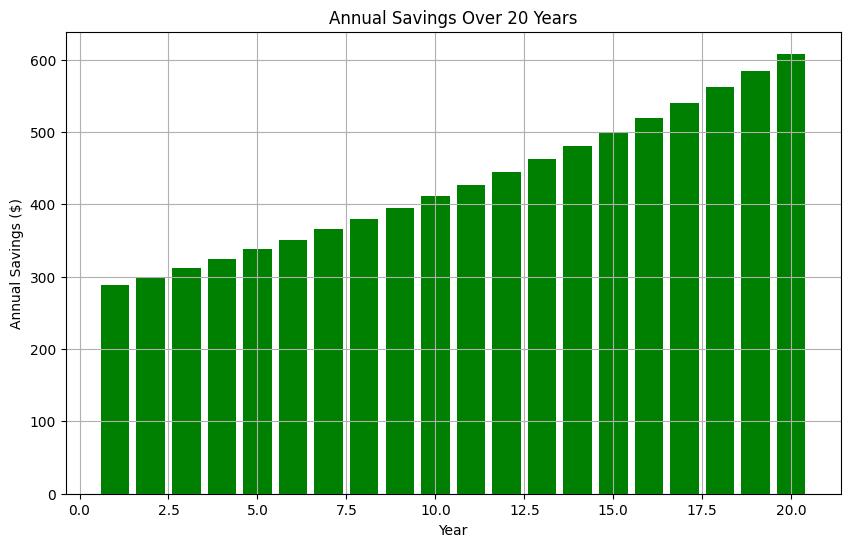

In [39]:
years = 20
annual_increase_rate = 0.04
initial_electricity_price = 0.17

# Calculate annual savings for each year over the 20-year period
annual_savings_scenario1 = []
for year in range(1, years + 1):
    total_cost_without_battery = df['Electricity bought'].sum() * initial_electricity_price
    total_cost_with_battery = df['Electricity bought with battery'].sum() * initial_electricity_price
    annual_savings = total_cost_without_battery - total_cost_with_battery
    annual_savings_scenario1.append(annual_savings)
    initial_electricity_price *= (1 + annual_increase_rate)

# annual savings plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, years + 1), annual_savings_scenario1, color='green')
plt.title('Annual Savings Over 20 Years')
plt.xlabel('Year')
plt.ylabel('Annual Savings ($)')
plt.grid(True)
plt.savefig('sce1_.png') 
plt.show()


#### 2.	Electricity price increases start at 4% p.a. and rise each year by an additional 0.25% p.a. 

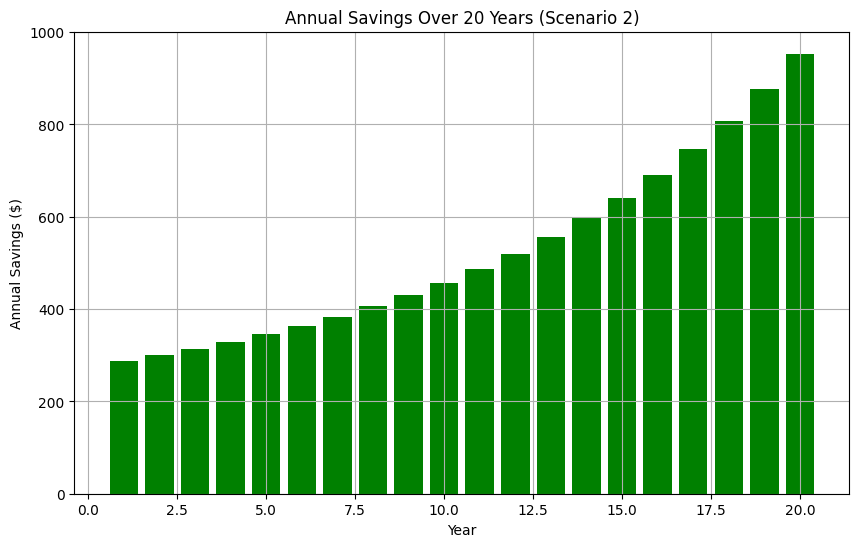

In [40]:
years = 20
annual_initial_increase_rate = 0.04
additional_increase_rate = 0.0025
initial_electricity_price = 0.17

# Calculate annual savings for each year over the 20-year period
annual_savings_scenario2 = []
for year in range(1, years + 1):
    total_cost_without_battery = df['Electricity bought'].sum() * initial_electricity_price
    total_cost_with_battery = df['Electricity bought with battery'].sum() * initial_electricity_price
    annual_savings = total_cost_without_battery - total_cost_with_battery
    annual_savings_scenario2.append(annual_savings)
    initial_electricity_price *= (1 + annual_initial_increase_rate + year * additional_increase_rate)

# Plot the annual savings using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, years + 1), annual_savings_scenario2, color='green')
plt.title('Annual Savings Over 20 Years (Scenario 2)')
plt.xlabel('Year')
plt.ylabel('Annual Savings ($)')
plt.grid(True)
plt.savefig('sce2_.png') 
plt.show()


# Internal Rate of Return (IRR) 

In [43]:

from scipy.optimize import newton
initial_battery_cost = 7000

# Define function to calculate NPV
def calculate_npv(rate, cashflows):
    return np.sum([cf / (1 + rate) ** i for i, cf in enumerate(cashflows)])

# Define function to find IRR
def find_irr(cashflows, initial_cost):
    return newton(lambda r: calculate_npv(r, cashflows) - initial_cost, x0=0.1)

# Define cashflows for each scenario
cashflows_scenario1 = [-initial_battery_cost] + annual_savings_scenario1
cashflows_scenario2 = [-initial_battery_cost] + annual_savings_scenario2

# Calculate IRR for Scenario 1
irr_scenario1 = find_irr(cashflows_scenario1, initial_battery_cost)

# Calculate IRR for Scenario 2
irr_scenario2 = find_irr(cashflows_scenario2, initial_battery_cost)

# Display the results
print("Scenario 1:")
print("Internal Rate of Return (IRR):", round(irr_scenario1 * 100, 2), "%")

print("\nScenario 2:")
print("Internal Rate of Return (IRR):", round(irr_scenario2 * 100, 2), "%")


Scenario 1:
Internal Rate of Return (IRR): -3.86 %

Scenario 2:
Internal Rate of Return (IRR): -2.2 %


## IRR at 6% anual discount

In [49]:
import numpy_financial as npf


initial_cost = 7000  
annual_savings_scenario1 = annual_savings_scenario2 
discount_rate = 0.06  

cash_flows = [-initial_cost] 


for savings in annual_savings_scenario1: 
    cash_flows.append(savings)

npv = npf.npv(discount_rate, cash_flows)

irr = npf.irr(cash_flows)


print(f"  (NPV)  ${npv:.2f}")
print(f" (IRR): {irr:.2%}")



  (NPV)  $-1673.41
 (IRR): 3.42%
